<a href="https://colab.research.google.com/github/hdjwis/FastballPrediction/blob/main/FastballPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pybaseball

In [ ]:
import pandas as pd

In [ ]:
from pybaseball import statcast
from pybaseball import playerid_lookup

# get data for July 15th, 2017 from pybaseball
data = statcast('2024-01-01', '2024-12-31')

This is a large query, it may take a moment to complete


/usr/local/lib/python3.11/dist-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)


Skipping offseason dates
Skipping offseason dates


  0%|          | 0/246 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/usr/local/lib/python3.11/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/usr/local/lib/python3.11/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = 

In [ ]:
data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
160,KC,2024-10-30,77.5,-1.11,5.65,"Buehler, Walker",657077,621111,strikeout,swinging_strike_blocked,...,<NA>,5.23,-1.08,1.08,53.2,25.834292,-25.475081,32.831211,34.481443,57.315365
171,KC,2024-10-30,78.7,-1.01,5.73,"Buehler, Walker",657077,621111,NaN,swinging_strike,...,<NA>,5.28,-1.05,1.05,54.2,35.519261,-41.027263,35.112657,29.474286,57.624781
184,FC,2024-10-30,93.1,-1.19,5.53,"Buehler, Walker",657077,621111,NaN,swinging_strike,...,<NA>,1.89,-0.53,0.53,44.8,19.401316,-32.989729,26.71055,16.32129,37.919472
193,KC,2024-10-30,78.5,-1.19,5.7,"Buehler, Walker",657077,621111,NaN,ball,...,<NA>,5.16,-1.05,1.05,51.9,<NA>,<NA>,<NA>,<NA>,<NA>
205,KC,2024-10-30,77.4,-1.23,5.78,"Buehler, Walker",669224,621111,strikeout,swinging_strike,...,<NA>,5.2,-1.08,1.08,50.0,22.6438,-12.035832,32.683497,40.578398,40.302028


In [ ]:
data = data.drop(['release_speed', 'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'events', 'description', 'spin_dir', 'spin_rate_deprecated',
           'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des', 'game_type', 'home_team', 'away_team', 'type', 'hit_location', 'bb_type',
           'game_year',	'pfx_x',	'pfx_z',	'plate_x',	'plate_z', 'hc_x',	'hc_y',	'tfs_deprecated',	'tfs_zulu_deprecated',	'umpire',	'sv_id',	'vx0',	'vy0',
           'vz0',	'ax',	'ay',	'az',	'sz_top',	'sz_bot',	'hit_distance_sc',	'launch_speed',	'launch_angle',	'effective_speed',	'release_spin_rate',
           'release_extension',	'game_pk',	'fielder_2',	'fielder_3',	'fielder_4',	'fielder_5',	'fielder_6',	'fielder_7',	'fielder_8',	'fielder_9',
           'release_pos_y',	'estimated_ba_using_speedangle',	'estimated_woba_using_speedangle',	'woba_value',	'woba_denom',	'babip_value',	'iso_value',
           'launch_speed_angle', 	'home_score',	'away_score', 'post_away_score',	'post_home_score',	'post_bat_score',	'post_fld_score',
           'spin_axis',	'delta_home_win_exp',	'delta_run_exp',	'bat_speed',	'swing_length',	'estimated_slg_using_speedangle',	'delta_pitcher_run_exp',
           'hyper_speed',	'home_score_diff', 'home_win_exp',	'bat_win_exp', 'age_pit_legacy',	'age_bat_legacy',	'age_pit',	'age_bat',
           'n_priorpa_thisgame_player_at_bat',	'pitcher_days_since_prev_game',	'batter_days_since_prev_game',	'pitcher_days_until_next_game',
           'batter_days_until_next_game',	'api_break_z_with_gravity',	'api_break_x_arm',	'api_break_x_batter_in',	'arm_angle', 'bat_score', 'fld_score',
           'attack_angle', 'attack_direction', 'swing_path_tilt','intercept_ball_minus_batter_pos_x_inches','intercept_ball_minus_batter_pos_y_inches'], axis=1)

In [ ]:
data.shape

(757713, 20)

In [ ]:
data['pitch_type'].value_counts()


,count
pitch_type,
FF,237550
SI,117341
SL,114423
CH,75732
FC,60922
ST,49244
CU,46454
FS,23063
KC,13354


In [ ]:
data.dropna()
data.shape

(757713, 20)

In [ ]:
data['on_3b'] = data['on_3b'].apply(lambda x: 1 if x > 0 else 0)
data['on_2b'] = data['on_2b'].apply(lambda x: 1 if x > 0 else 0)
data['on_1b'] = data['on_1b'].apply(lambda x: 1 if x > 0 else 0)
data['fastball'] = data['pitch_type'].apply(lambda x: 1 if x in ['FF', 'FC', 'SI'] else 0)
data = data.drop('pitch_type', axis=1)

In [ ]:
data['on_3b'].value_counts()

,count
on_3b,
0,686878
1,70835


In [ ]:
data['on_2b'].value_counts()

,count
on_2b,
0,616465
1,141248


In [ ]:
data['on_1b'].value_counts()

,count
on_1b,
0,527641
1,230072


In [ ]:
data['fastball'].value_counts()

,count
fastball,
1,415813
0,341900


In [ ]:
data.head()

,game_date,pitcher,stand,p_throws,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,at_bat_number,pitch_number,pitch_name,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball
160,2024-10-30,621111,L,R,1,2,0,0,0,2,9,Bot,89,4,Knuckle Curve,Infield shade,Standard,-1,1,0
171,2024-10-30,621111,L,R,1,1,0,0,0,2,9,Bot,89,3,Knuckle Curve,Infield shade,Standard,-1,1,0
184,2024-10-30,621111,L,R,1,0,0,0,0,2,9,Bot,89,2,Cutter,Infield shade,Standard,-1,1,1
193,2024-10-30,621111,L,R,0,0,0,0,0,2,9,Bot,89,1,Knuckle Curve,Infield shade,Standard,-1,1,0
205,2024-10-30,621111,L,R,3,2,0,0,0,1,9,Bot,88,7,Knuckle Curve,Infield shade,Standard,-1,1,0


In [ ]:
data['batter_handedness'] = data['stand'].apply(lambda x: 1 if x == 'R' else 0)
data['pitcher_handedness'] = data['p_throws'].apply(lambda x: 1 if x == 'R' else 0)
data = data.drop(['game_date', 'stand', 'p_throws', 'inning_topbot', 'at_bat_number', 'pitch_name'], axis=1)
data.head()

,pitcher,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
160,621111,1,2,0,0,0,2,9,4,Infield shade,Standard,-1,1,0,0,1
171,621111,1,1,0,0,0,2,9,3,Infield shade,Standard,-1,1,0,0,1
184,621111,1,0,0,0,0,2,9,2,Infield shade,Standard,-1,1,1,0,1
193,621111,0,0,0,0,0,2,9,1,Infield shade,Standard,-1,1,0,0,1
205,621111,3,2,0,0,0,1,9,7,Infield shade,Standard,-1,1,0,0,1


In [ ]:
data['if_fielding_alignment'].value_counts()

,count
if_fielding_alignment,
Standard,497607
Infield shade,173195
Strategic,65103


In [ ]:
data['of_fielding_alignment'].value_counts()

,count
of_fielding_alignment,
Standard,709143
Strategic,26761
4th outfielder,1


In [ ]:
data['if_fielding_alignment'] = data['if_fielding_alignment'].apply(lambda x: 1 if x == 'Standard' else 0)
data['of_fielding_alignment'] = data['of_fielding_alignment'].apply(lambda x: 1 if x == 'Standard' else 0)

In [ ]:
data.head()

,pitcher,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
160,621111,1,2,0,0,0,2,9,4,0,1,-1,1,0,0,1
171,621111,1,1,0,0,0,2,9,3,0,1,-1,1,0,0,1
184,621111,1,0,0,0,0,2,9,2,0,1,-1,1,1,0,1
193,621111,0,0,0,0,0,2,9,1,0,1,-1,1,0,0,1
205,621111,3,2,0,0,0,1,9,7,0,1,-1,1,0,0,1


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [ ]:
data.groupby(['balls','strikes'])['fastball'].value_counts()

balls  strikes  fastball
0      0        1           116497
                0            80866
       1        1            49659
                0            49530
       2        0            29883
                1            22775
1      0        1            42637
                0            29799
       1        1            38391
                0            37038
       2        0            40938
                1            32973
2      0        1            16803
                0             7553
       1        1            22560
                0            15884
       2        0            31864
                1            30681
3      0        1             6821
                0              921
       1        1            12242
                0             3547
       2        1            23773
                0            14077
4      2        1                1
Name: count, dtype: int64

In [ ]:
data = data[data['balls'] != 4]

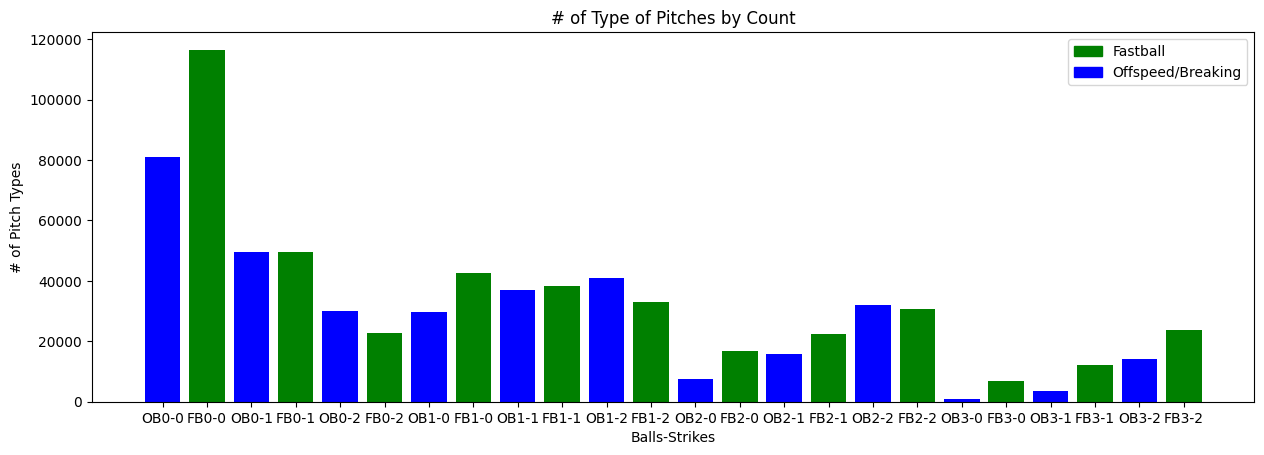

In [ ]:
fig, ax = plt.subplots()

for i in np.sort(data['balls'].unique()):
  for j in np.sort(data['strikes'].unique()):
    for fastball_val in np.sort(data['fastball'].unique()):
      s = data[data['fastball'] == fastball_val].groupby(['balls','strikes'])['fastball'].value_counts()
      color = 'green' if fastball_val == 1 else 'blue'
      fastball = 'FB' if fastball_val == 1 else 'OB'
      ax.bar(x=f'{fastball}{i}-{j}', height=s[i][j], color=color)

plt.xlabel('Balls-Strikes')
plt.ylabel('# of Pitch Types')
plt.title('# of Type of Pitches by Count')
green_patch = mpatches.Patch(color='green', label='Fastball')
blue_patch = mpatches.Patch(color='blue', label='Offspeed/Breaking')
ax.legend(handles=[green_patch, blue_patch])
fig.set_figwidth(15)
plt.show()


In [ ]:
data.head()

,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
161,1,2,0,0,0,2,9,4,0,1,-1,1,0,0,1
173,1,1,0,0,0,2,9,3,0,1,-1,1,0,0,1
180,1,0,0,0,0,2,9,2,0,1,-1,1,1,0,1
188,0,0,0,0,0,2,9,1,0,1,-1,1,0,0,1
202,3,2,0,0,0,1,9,7,0,1,-1,1,0,0,1


In [ ]:
data.groupby(['on_1b', 'on_2b', 'on_3b'])['fastball'].value_counts()


on_1b  on_2b  on_3b  fastball
0      0      0      1           241010
                     0           194002
              1      1             9563
                     0             8900
       1      0      1            30605
                     0            28691
              1      1             7526
                     0             7343
1      0      0      1            80045
                     0            61869
              1      1            11334
                     0             9742
       1      0      1            26621
                     0            24034
              1      1             9050
                     0             7377
Name: count, dtype: int64

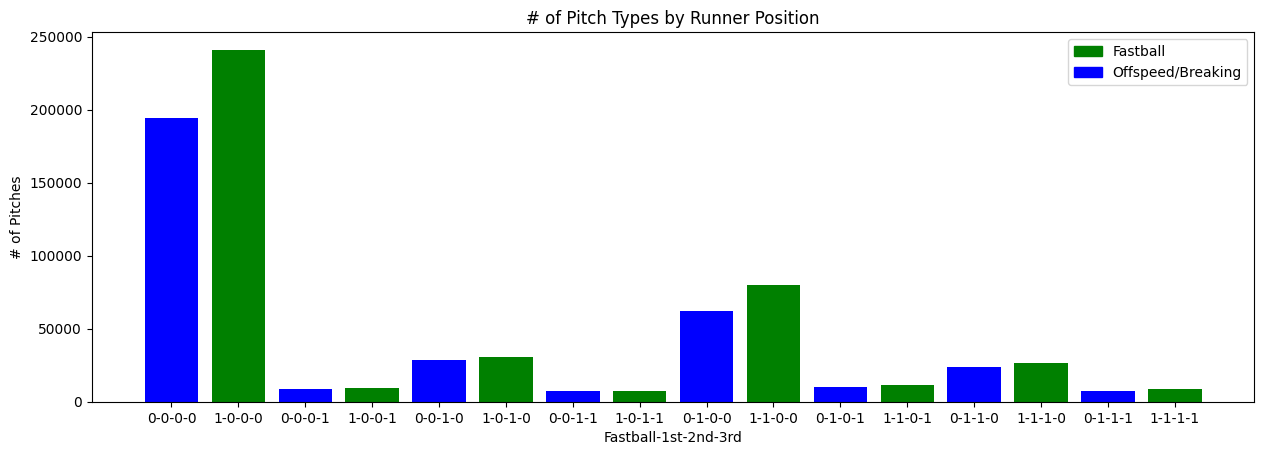

In [ ]:
fig, ax = plt.subplots()

for i in data['on_1b'].unique():
  for j in data['on_2b'].unique():
    for k in data['on_3b'].unique():
      for fastball_val in data['fastball'].unique():
        s = data[data['fastball'] == fastball_val].groupby(['on_1b', 'on_2b', 'on_3b'])['fastball'].value_counts()
        color = 'green' if fastball_val == 1 else 'blue'
        ax.bar(x=f'{fastball_val}-{i}-{j}-{k}', height=s[i][j][k], color=color)


plt.xlabel('Fastball-1st-2nd-3rd')
plt.ylabel('# of Pitches')
plt.title('# of Pitch Types by Runner Position')
green_patch = mpatches.Patch(color='green', label='Fastball')
blue_patch = mpatches.Patch(color='blue', label='Offspeed/Breaking')
ax.legend(handles=[green_patch, blue_patch])
fig.set_figwidth(15)
plt.show()


In [ ]:
data.head()

,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
161,1,2,0,0,0,2,9,4,0,1,-1,1,0,0,1
173,1,1,0,0,0,2,9,3,0,1,-1,1,0,0,1
180,1,0,0,0,0,2,9,2,0,1,-1,1,1,0,1
188,0,0,0,0,0,2,9,1,0,1,-1,1,0,0,1
202,3,2,0,0,0,1,9,7,0,1,-1,1,0,0,1


In [ ]:
data.groupby(['n_thruorder_pitcher'])['fastball'].value_counts()


n_thruorder_pitcher  fastball
1                    1           275082
                     0           213290
2                    1            94653
                     0            86273
3                    1            45153
                     0            41592
4                    1              866
                     0              803
Name: count, dtype: int64

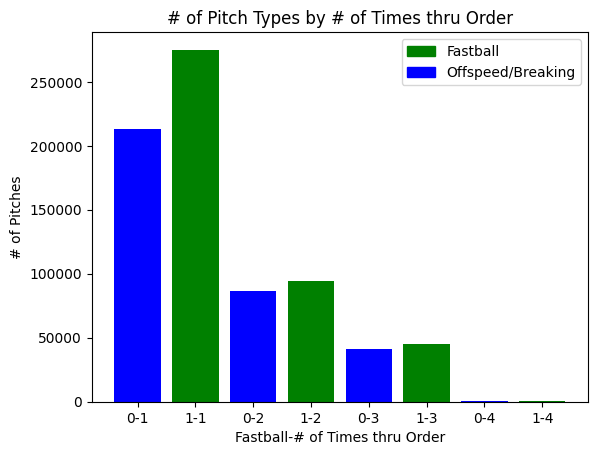

In [ ]:
fig, ax = plt.subplots()

for i in np.sort(data['n_thruorder_pitcher'].unique()):
  for fastball_val in data['fastball'].unique():
    s = data[data['fastball'] == fastball_val].groupby(['n_thruorder_pitcher'])['fastball'].value_counts()
    color = 'green' if fastball_val == 1 else 'blue'
    ax.bar(x=f'{fastball_val}-{i}', height=s[i], color=color)


plt.xlabel('Fastball-# of Times thru Order')
plt.ylabel('# of Pitches')
plt.title('# of Pitch Types by # of Times thru Order')
green_patch = mpatches.Patch(color='green', label='Fastball')
blue_patch = mpatches.Patch(color='blue', label='Offspeed/Breaking')
ax.legend(handles=[green_patch, blue_patch])
plt.show()


In [ ]:
data.head()

,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
161,1,2,0,0,0,2,9,4,0,1,-1,1,0,0,1
173,1,1,0,0,0,2,9,3,0,1,-1,1,0,0,1
180,1,0,0,0,0,2,9,2,0,1,-1,1,1,0,1
188,0,0,0,0,0,2,9,1,0,1,-1,1,0,0,1
202,3,2,0,0,0,1,9,7,0,1,-1,1,0,0,1


In [ ]:
data.groupby(['inning'])['fastball'].value_counts()


inning  fastball
1       1           51906
        0           35355
2       1           47987
        0           37786
3       1           45512
        0           39598
4       1           43963
        0           39846
5       1           44646
        0           39712
6       1           45488
        0           39737
7       1           47120
        0           39157
8       1           46945
        0           38776
9       1           37393
        0           28126
10      1            3475
        0            2725
11      1             797
        0             709
12      1             371
        0             325
13      1             124
        0              89
14      1              27
        0              17
Name: count, dtype: int64

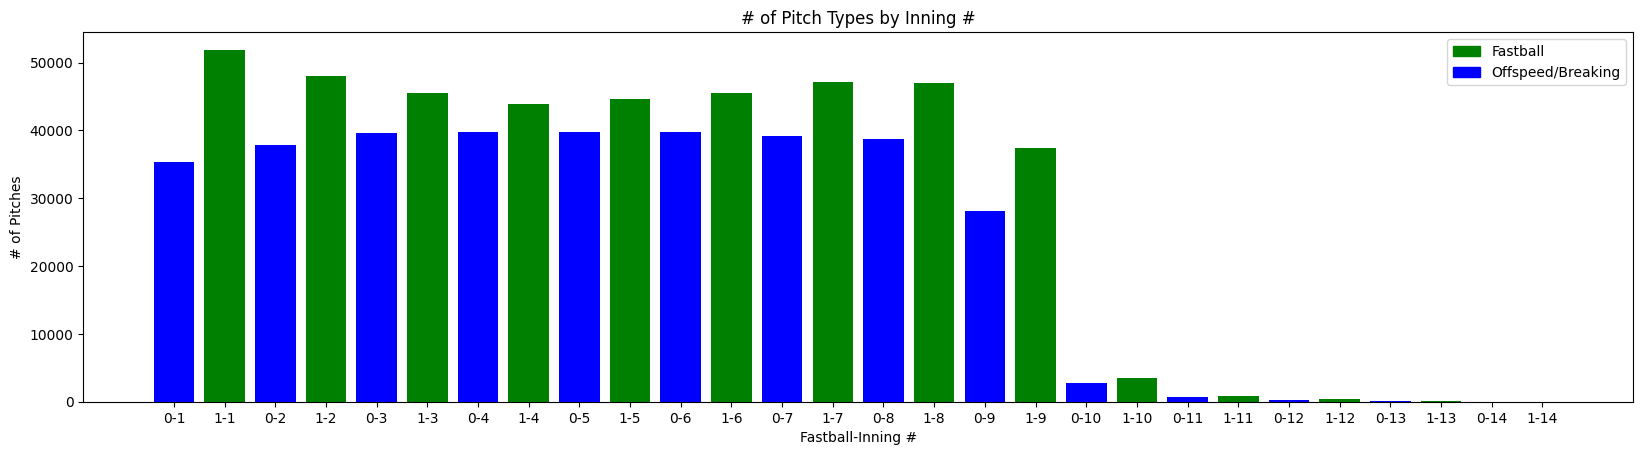

In [ ]:
fig, ax = plt.subplots()

for i in np.sort(data['inning'].unique()):
  for fastball_val in data['fastball'].unique():
    s = data[data['fastball'] == fastball_val].groupby(['inning'])['fastball'].value_counts()
    color = 'green' if fastball_val == 1 else 'blue'
    ax.bar(x=f'{fastball_val}-{i}', height=s[i], color=color)


plt.xlabel('Fastball-Inning #')
plt.ylabel('# of Pitches')
plt.title('# of Pitch Types by Inning #')
green_patch = mpatches.Patch(color='green', label='Fastball')
blue_patch = mpatches.Patch(color='blue', label='Offspeed/Breaking')
ax.legend(handles=[green_patch, blue_patch])
fig.set_figwidth(20)
plt.show()


In [ ]:
data.head()

,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
161,1,2,0,0,0,2,9,4,0,1,-1,1,0,0,1
173,1,1,0,0,0,2,9,3,0,1,-1,1,0,0,1
180,1,0,0,0,0,2,9,2,0,1,-1,1,1,0,1
188,0,0,0,0,0,2,9,1,0,1,-1,1,0,0,1
202,3,2,0,0,0,1,9,7,0,1,-1,1,0,0,1


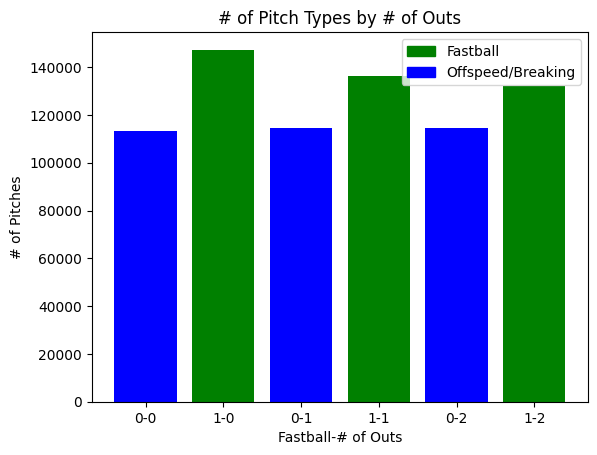

In [ ]:
fig, ax = plt.subplots()

for i in np.sort(data['outs_when_up'].unique()):
  for fastball_val in np.sort(data['fastball'].unique()):
    s = data[data['fastball'] == fastball_val].groupby(['outs_when_up'])['fastball'].value_counts()
    color = 'green' if fastball_val == 1 else 'blue'
    ax.bar(x=f'{fastball_val}-{i}', height=s[i], color=color)


plt.xlabel('Fastball-# of Outs')
plt.ylabel('# of Pitches')
plt.title('# of Pitch Types by # of Outs')
green_patch = mpatches.Patch(color='green', label='Fastball')
blue_patch = mpatches.Patch(color='blue', label='Offspeed/Breaking')
ax.legend(handles=[green_patch, blue_patch])
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data.head()

,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
161,1,2,0,0,0,2,9,4,0,1,-1,1,0,0,1
173,1,1,0,0,0,2,9,3,0,1,-1,1,0,0,1
180,1,0,0,0,0,2,9,2,0,1,-1,1,1,0,1
188,0,0,0,0,0,2,9,1,0,1,-1,1,0,0,1
202,3,2,0,0,0,1,9,7,0,1,-1,1,0,0,1


In [ ]:
X = data[['balls', 'strikes', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'n_thruorder_pitcher']]
y = data['fastball']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.569059606844262

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5687824577842593

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_grid = RandomForestClassifier(random_state=0)
params = {'n_estimators': [100, 150],
          'max_depth': [2, 3],
          'min_samples_split': [3, 2],
          'min_samples_leaf': [1, 2],
          'max_features': [2, 3]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.5653576872570821

In [ ]:
gs.best_params_

{'max_depth': 3,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [ ]:
rf_grid = RandomForestClassifier(min_samples_leaf=1, n_estimators=100, random_state=0)
params = {'max_depth': [4,5],
          'min_samples_split': [4, 5],
          'max_features': [4, 5]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.5722006295242934

In [ ]:
gs.best_params_

{'max_depth': 5, 'max_features': 5, 'min_samples_split': 5}

In [ ]:
rf_grid = RandomForestClassifier(min_samples_leaf=1, n_estimators=100, random_state=0)
params = {'max_depth': [6, 7],
          'min_samples_split': [6, 7],
          'max_features': [6, 7]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.5734214051457343

In [ ]:
gs.best_params_

{'max_depth': 7, 'max_features': 6, 'min_samples_split': 6}

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.5724183895000099

In [ ]:
data.head()

,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
161,1,2,0,0,0,2,9,4,0,1,-1,1,0,0,1
173,1,1,0,0,0,2,9,3,0,1,-1,1,0,0,1
180,1,0,0,0,0,2,9,2,0,1,-1,1,1,0,1
188,0,0,0,0,0,2,9,1,0,1,-1,1,0,0,1
202,3,2,0,0,0,1,9,7,0,1,-1,1,0,0,1


In [ ]:
data['0-0'] = np.where((data['balls'] == 0) & (data['strikes'] == 0), 1, 0)
data['1-0'] = np.where((data['balls'] == 1) & (data['strikes'] == 0), 1, 0)
data['2-0'] = np.where((data['balls'] == 2) & (data['strikes'] == 0), 1, 0)
data['3-0'] = np.where((data['balls'] == 3) & (data['strikes'] == 0), 1, 0)
data['0-1'] = np.where((data['balls'] == 0) & (data['strikes'] == 1), 1, 0)
data['1-1'] = np.where((data['balls'] == 1) & (data['strikes'] == 1), 1, 0)
data['2-1'] = np.where((data['balls'] == 2) & (data['strikes'] == 1), 1, 0)
data['3-1'] = np.where((data['balls'] == 3) & (data['strikes'] == 1), 1, 0)
data['0-2'] = np.where((data['balls'] == 0) & (data['strikes'] == 2), 1, 0)
data['1-2'] = np.where((data['balls'] == 1) & (data['strikes'] == 2), 1, 0)
data['2-2'] = np.where((data['balls'] == 2) & (data['strikes'] == 2), 1, 0)
data['3-2'] = np.where((data['balls'] == 3) & (data['strikes'] == 2), 1, 0)

In [ ]:
data.head()

,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,...,2-0,3-0,0-1,1-1,2-1,3-1,0-2,1-2,2-2,3-2
161,1,2,0,0,0,2,9,4,0,1,...,0,0,0,0,0,0,0,1,0,0
173,1,1,0,0,0,2,9,3,0,1,...,0,0,0,1,0,0,0,0,0,0
180,1,0,0,0,0,2,9,2,0,1,...,0,0,0,0,0,0,0,0,0,0
188,0,0,0,0,0,2,9,1,0,1,...,0,0,0,0,0,0,0,0,0,0
202,3,2,0,0,0,1,9,7,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
new_X = data[['on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'n_thruorder_pitcher', '0-0', '1-0', '2-0', '3-0', '0-1', '1-1', '2-1', '3-1', '0-2', '1-2', '2-2', '3-2']]
new_y = data['fastball']
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
new_lr = LogisticRegression(random_state=0)
new_lr.fit(new_X_train, new_y_train)
new_lr.score(new_X_test, new_y_test)

0.569059606844262

In [ ]:
new_rf = RandomForestClassifier(random_state=0)
new_rf.fit(new_X_train, new_y_train)
new_rf.score(new_X_test, new_y_test)

0.5687824577842593

In [ ]:
new_xgb = XGBClassifier(random_state=0)
new_xgb.fit(new_X_train, new_y_train)
new_xgb.score(new_X_test, new_y_test)

0.5724183895000099

Next steps:
* add fastball percentage by pitcher
* explore metrics other than accuracy
* tune the xgboost model
* make decision matrix and other graphs to evaluate
* use the model to deploy a web app

In [ ]:
total_pitches = data.groupby('pitcher')['fastball'].count()
total_fastballs = data[data['fastball'] == 1].groupby('pitcher')['fastball'].count()
fasbtall_percentage = total_fastballs / total_pitches
fasbtall_percentage.rename('fastball_percentage', inplace=True)
fasbtall_percentage.head()

,fastball_percentage
pitcher,
434378,0.486709
445276,0.897959
445926,0.770718
448179,0.521127
450203,0.454670


In [ ]:
data = pd.merge(data, fasbtall_percentage, on='pitcher', how='left')
data.head()

,pitcher,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness,fastball_percentage
0,621111,1,2,0,0,0,2,9,4,0,1,-1,1,0,0,1,0.652665
1,621111,1,1,0,0,0,2,9,3,0,1,-1,1,0,0,1,0.652665
2,621111,1,0,0,0,0,2,9,2,0,1,-1,1,1,0,1,0.652665
3,621111,0,0,0,0,0,2,9,1,0,1,-1,1,0,0,1,0.652665
4,621111,3,2,0,0,0,1,9,7,0,1,-1,1,0,0,1,0.652665


In [ ]:
data[data['fastball_percentage'].isnull()]['pitcher'].unique()

<IntegerArray>
[571657, 623168, 683021, 657193, 640902, 660644, 660844, 571771, 500743,
 622268,
 ...
 695071, 656686, 620454, 681493, 669192, 672730, 641627, 674175, 670245,
 694553]
Length: 185, dtype: Int64

In [ ]:
data[data['fastball_percentage'] == 1.0]

,pitcher,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness,fastball_percentage
3173,683618,1,0,1,0,1,2,9,2,1,1,-8,1,1,1,1,1.0
3174,683618,0,0,1,0,1,2,9,1,1,1,-8,1,1,1,1,1.0
3175,683618,0,0,0,1,1,1,9,1,1,1,-8,1,1,0,1,1.0
3176,683618,0,0,0,0,1,1,9,1,1,1,-8,1,1,1,1,1.0
3177,683618,0,2,0,0,0,1,9,3,1,1,-8,1,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750715,669443,1,0,0,0,1,0,8,2,1,1,2,1,1,1,1,1.0
750716,669443,0,0,0,0,1,0,8,1,1,1,2,1,1,1,1,1.0
750717,669443,0,2,0,0,0,0,8,3,1,1,2,1,1,1,1,1.0
750718,669443,0,1,0,0,0,0,8,2,0,1,2,1,1,1,1,1.0


In [ ]:
data.fillna(0.0, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X = data[['balls', 'strikes', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'n_thruorder_pitcher', 'fastball_percentage']]
y = data['fastball']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6151257398890084

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5793141220643646

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_grid = RandomForestClassifier(random_state=0)
params = {'n_estimators': [100, 150],
          'max_depth': [2, 3],
          'min_samples_split': [3, 2]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.6097015368575256

In [ ]:
gs.best_params_

{'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 150}

In [ ]:
rf_grid = RandomForestClassifier(random_state=0)
params = {'n_estimators': [150],
          'max_depth': [4, 5],
          'min_samples_split': [3, 4]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.6160825640247323

In [ ]:
gs.best_params_

{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 150}

In [ ]:
rf_grid = RandomForestClassifier(random_state=0)
params = {'n_estimators': [150],
          'max_depth': [6, 7],
          'min_samples_split': [5, 6]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.6199362557161994

In [ ]:
gs.best_params_

{'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 150}

In [ ]:
rf_grid = RandomForestClassifier(random_state=0)
params = {'n_estimators': [150],
          'max_depth': [8, 7],
          'min_samples_split': [5, 4]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.6213220010162133

In [ ]:
gs.best_params_

{'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 150}

In [ ]:
rf_grid = RandomForestClassifier(random_state=0, min_samples_split=5)
params = {'n_estimators': [150, 200],
          'max_depth': [8, 9]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.6219092930719334

In [ ]:
gs.best_params_

{'max_depth': 9, 'n_estimators': 150}

In [ ]:


rf_grid = RandomForestClassifier(random_state=0, min_samples_split=5, max_depth=9, n_estimators=150)
params = {'min_samples_leaf': [3, 2],
          'max_features': [4, 3]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.6222656275776512

In [ ]:
gs.best_params_

{'max_features': 4, 'min_samples_leaf': 3}

In [ ]:

rf_grid = RandomForestClassifier(random_state=0, min_samples_split=5, max_depth=9, n_estimators=150)
params = {'min_samples_leaf': [4, 5],
          'max_features': [5, 6]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.6227011475290841

In [ ]:
final_model = gs.best_estimator_

In [ ]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(final_model, f)